## Dependency

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from scipy.special import factorial

## Import Samples

In [2]:
samples = pd.read_csv("generated_samples.csv", header = None)
samples = np.array(samples)
samples

array([[49.34730472, 66.83187103],
       [54.09552238, 37.45451604],
       [54.73661566, 37.73667945],
       ...,
       [18.33586193, 14.80802943],
       [42.07118372, 44.64594851],
       [21.3576305 , 14.40170402]])

## Kmeans

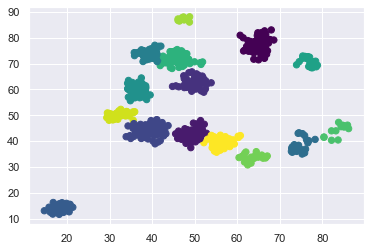

In [15]:
kmeans = KMeans(15, random_state = 0)
labels = kmeans.fit(samples).predict(samples)
plt.scatter(samples[:,0], samples[:,1], c=labels, s=40, cmap='viridis')

## GMM

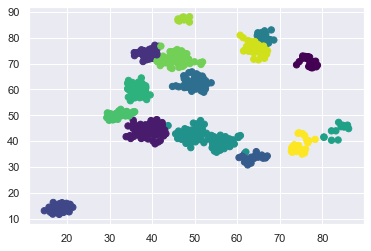

In [19]:
gmm = GMM(n_components=15, covariance_type='full', random_state=0).fit(samples)
labels = gmm.predict(samples)
plt.scatter(samples[:, 0], samples[:, 1], c=labels, s=40, cmap='viridis');

### Probs

In [5]:
probs = gmm.predict_proba(samples)
print(probs[:5].round(3))

[[0.    0.    0.    0.    0.    0.851 0.    0.    0.    0.    0.    0.149
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.   ]]


### BIC and AIC

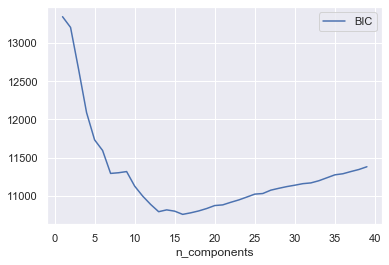

In [21]:
n_components = np.arange(1, 40)
models = [GMM(n, covariance_type='full', random_state=0).fit(samples)
          for n in n_components]

plt.plot(n_components, [m.bic(samples) for m in models], label='BIC')
# plt.plot(n_components, [m.aic(samples) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

## Original Data

In [7]:
origin = pd.read_csv("data_proj_414.csv")
origin

,Unnamed: 0,X,Y,Potter,Weasley,Granger,Trip,Close,Far
0,1,2.466284,3.582118,1,0,0,1,0,0
1,2,5.508336,8.295713,1,0,0,1,0,0
2,3,6.784481,11.851393,1,0,0,1,0,0
3,4,7.550499,14.411812,1,0,0,1,0,0
4,5,10.402096,17.218079,1,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...
24089,24090,40.615083,74.485727,0,0,1,49,4,16
24090,24091,41.485127,74.335721,0,0,1,49,1,8
24091,24092,41.275887,76.995216,0,0,1,49,1,2
24092,24093,42.176981,76.159014,0,0,1,49,0,1


In [8]:
origin_plot = origin[["X","Y","Close","Far"]].groupby(["X", "Y"]).mean()
origin_plot = pd.DataFrame(origin_plot)
origin_plot

,,Close,Far
X,Y,,
0.560808,3.961859,0,0
0.708687,3.951821,0,0
1.032733,1.781814,0,0
1.135191,2.924941,0,0
1.143806,3.122235,0,0
...,...,...,...
85.143369,45.515834,6,15
85.374453,67.285704,0,1
85.860814,66.796367,0,3


In [9]:
positions = np.array(origin_plot.index.tolist())
positions[:,1]

array([ 3.96185881,  3.95182135,  1.78181384, ..., 66.79636689,
       66.49994866, 64.36000261])

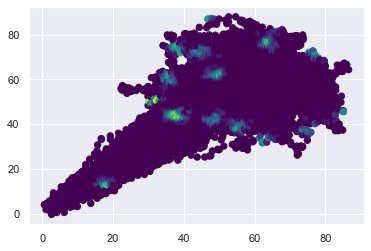

In [10]:
plt.scatter(positions[:,0], positions[:,1], c=origin_plot["Close"], s=40, cmap='viridis')

## Observed Area

In [11]:
area_grid = np.zeros((107, 107))
for i in positions:
    area_grid[int(i[0] // 1), int(i[1] // 1)] = 1
area = np.sum(area_grid) * 1 * 1
area

2744.0

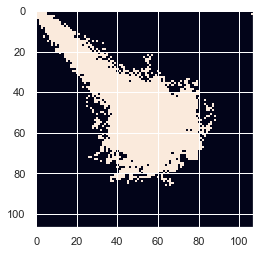

In [12]:
plt.imshow(area_grid)

## Total Number

In [13]:
total_v1 = round(15 * 107 * 107 / area)
total_v1

63.0

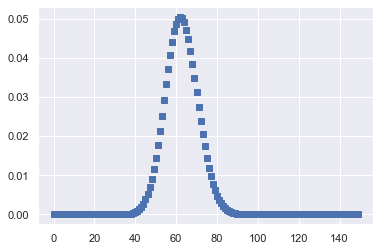

In [14]:
lamb = 15 * 107 * 107 / area

x_axis = np.arange(0, 150, 1)
y_axis = np.exp(-lamb)*np.power(lamb, x_axis)/factorial(x_axis)

plt.plot(x_axis, y_axis, 'bs')
plt.show()

In [111]:
total_v2 = pd.DataFrame(np.array(y_axis)).idxmax()
total_v2

0    62
dtype: int64